In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mlb_missed_and_total_calls_plus_runs.csv')

In [3]:
df.head()

,Unnamed: 0,player_name,B,S,ball,called_strike,missed_call_dre_B,missed_call_dre_S,batter_team
0,0,A.J. Pollock-SEA,9.0,7.0,169.0,73.0,-1.096,0.934,SEA
1,1,A.J. Pollock-SF,1.0,2.0,13.0,5.0,-0.075,0.149,SF
2,2,Aaron Hicks-BAL,13.0,9.0,247.0,141.0,-1.583,1.219,BAL
3,3,Aaron Hicks-NYY,11.0,6.0,112.0,53.0,-1.664,0.627,NYY
4,4,Aaron Judge-NYY,34.0,21.0,459.0,190.0,-4.257,2.557,NYY


In [4]:
def elim_team(df):
    return df['player_name'][0:-(len(df['batter_team'])+1)]

In [5]:
df['player_name'] = df.apply(elim_team,axis=1)

In [6]:
df['player_name'].head()

0    A.J. Pollock
1    A.J. Pollock
2     Aaron Hicks
3     Aaron Hicks
4     Aaron Judge
Name: player_name, dtype: object

In [7]:
df = df.groupby('player_name').sum().reset_index()

In [8]:
df['inc_strike_pct'] = df['B']/df['called_strike']*100

In [9]:
df.head()

,player_name,Unnamed: 0,B,S,ball,called_strike,missed_call_dre_B,missed_call_dre_S,inc_strike_pct
0,A.J. Pollock,1,10.0,9.0,182.0,78.0,-1.171,1.083,12.820513
1,Aaron Hicks,5,24.0,15.0,359.0,194.0,-3.247,1.846,12.371134
2,Aaron Judge,4,34.0,21.0,459.0,190.0,-4.257,2.557,17.894737
3,Abraham Almonte,5,2.0,1.0,11.0,6.0,-0.389,0.036,33.333333
4,Abraham Toro,6,2.0,0.0,17.0,18.0,-0.091,0.000,11.111111


In [10]:
from pybaseball.lahman import *
download_lahman() #download the entire lahman database to your current working directory

# a table of all player biographical info and ids
people = people()

In [11]:
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [12]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20878 entries, 0 to 20877
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20878 non-null  object 
 1   birthYear     20772 non-null  float64
 2   birthMonth    20605 non-null  float64
 3   birthDay      20462 non-null  float64
 4   birthCountry  20819 non-null  object 
 5   birthState    20352 non-null  object 
 6   birthCity     20711 non-null  object 
 7   deathYear     10167 non-null  float64
 8   deathMonth    10166 non-null  float64
 9   deathDay      10165 non-null  float64
 10  deathCountry  10160 non-null  object 
 11  deathState    10103 non-null  object 
 12  deathCity     10155 non-null  object 
 13  nameFirst     20842 non-null  object 
 14  nameLast      20878 non-null  object 
 15  nameGiven     20842 non-null  object 
 16  weight        20068 non-null  float64
 17  height        20147 non-null  float64
 18  bats          19701 non-nu

In [13]:
ids = pd.read_csv('player_ids.csv')

In [14]:
ids.head()

,IDPLAYER,PLAYERNAME,BIRTHDATE,FIRSTNAME,LASTNAME,TEAM,LG,POS,IDFANGRAPHS,FANGRAPHSNAME,...,OTTONEUID,HQID,RAZZBALLNAME,FANTRAXID,FANTRAXNAME,ROTOWIRENAME,ALLPOS,NFBCLASTFIRST,ACTIVE,UNDERDOG
0,abreubo01,Bobby Abreu,3/11/1974,Bobby,Abreu,NaN,NaN,OF,945,Bobby Abreu,...,8984.0,NaN,Bobby Abreu,NaN,Bobby Abreu,Bobby Abreu,OF,"Abreu, Bobby",N,NaN
1,blanche01,Henry Blanco,8/29/1971,Henry,Blanco,NaN,NaN,C,81,Henry Blanco,...,6975.0,NaN,Henry Blanco,NaN,Henry Blanco,Henry Blanco,C,"Blanco, Henry",N,NaN
2,camermi01,Mike Cameron,1/8/1973,Mike,Cameron,NaN,NaN,OF,1070,Mike Cameron,...,7824.0,NaN,Mike Cameron,NaN,Mike Cameron,Mike Cameron,OF,"Cameron, Mike",N,NaN
3,carpech01,Chris Carpenter,4/27/1975,Chris,Carpenter,NaN,NaN,P,1292,Chris Carpenter,...,7006.0,NaN,Chris Carpenter,NaN,Chris Carpenter,Chris Carpenter,P,"Carpenter, Chris",N,NaN
4,colonba01,Bartolo Colon,5/24/1973,Bartolo,Colon,NaN,NaN,P,375,Bartolo Colon,...,1980.0,189.0,Bartolo Colon,*000j7*,Bartolo Colon,Bartolo Colon,P,"Colon, Bartolo",N,NaN


In [15]:
ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDPLAYER        3138 non-null   object 
 1   PLAYERNAME      3138 non-null   object 
 2   BIRTHDATE       3138 non-null   object 
 3   FIRSTNAME       3138 non-null   object 
 4   LASTNAME        3138 non-null   object 
 5   TEAM            2077 non-null   object 
 6   LG              2076 non-null   object 
 7   POS             3138 non-null   object 
 8   IDFANGRAPHS     3137 non-null   object 
 9   FANGRAPHSNAME   3138 non-null   object 
 10  MLBID           3137 non-null   float64
 11  MLBNAME         3137 non-null   object 
 12  CBSID           3095 non-null   float64
 13  CBSNAME         3138 non-null   object 
 14  RETROID         2228 non-null   object 
 15  BREFID          3136 non-null   object 
 16  NFBCID          2323 non-null   float64
 17  NFBCNAME        3134 non-null   o

In [16]:
#from pybaseball import statcast

In [17]:
#pitches_full = statcast(start_dt="2023-03-30", end_dt="2023-09-25",verbose=True)

In [18]:
#pitches_full = pitches_full.loc[(pitches_full['description'] == 'called_strike') | (pitches_full['description'] == 'ball')]

In [19]:
#pitches_full = pitches_full[pitches_full['zone'].notna()]

In [20]:
#pitches_full = pitches_full[pitches_full['effective_speed'].notna()]

In [21]:
#pitches_full.to_csv('mlb_2023_full.csv')

In [22]:
#pitches_full.info()

In [23]:
pitches = pd.read_csv('mlb_2023_full.csv')

In [24]:
pitches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345398 entries, 0 to 345397
Data columns (total 93 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       345398 non-null  int64  
 1   pitch_type                       345398 non-null  object 
 2   game_date                        345398 non-null  object 
 3   release_speed                    345398 non-null  float64
 4   release_pos_x                    345398 non-null  float64
 5   release_pos_z                    345398 non-null  float64
 6   player_name                      345398 non-null  object 
 7   batter                           345398 non-null  int64  
 8   pitcher                          345398 non-null  int64  
 9   events                           23069 non-null   object 
 10  description                      345398 non-null  object 
 11  spin_dir                         0 non-null       float64
 12  sp

# DataFrame Merging, Data Exploration, Feature Engineering, Data Filtering, Outlier Removal

In [25]:
ids = ids[['MLBID','MLBNAME','IDPLAYER']]

ids = ids.dropna()

ids['MLBID'] = ids['MLBID'].astype(int)

In [26]:
pitches = pitches.merge(ids,left_on='batter',right_on='MLBID')

pitches = pitches.drop('player_name',axis=1)

pitches = pitches.rename(columns={'MLBNAME':'player_name'})

In [27]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,MLBID,player_name,IDPLAYER
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,4,6,Standard,Standard,51.0,0.0,0.040,677950,Alek Thomas,thomaal01
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,4,6,NaN,Standard,226.0,0.0,-0.021,677950,Alek Thomas,thomaal01
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,4,6,NaN,Standard,229.0,0.0,0.016,677950,Alek Thomas,thomaal01
3,959,SL,2023-09-25,87.9,-2.37,6.22,677950,641656,NaN,ball,...,3,3,NaN,Standard,159.0,0.0,0.037,677950,Alek Thomas,thomaal01
4,784,CH,2023-09-25,85.1,-3.89,4.85,677950,669711,NaN,ball,...,2,2,Standard,Standard,268.0,0.0,0.024,677950,Alek Thomas,thomaal01


In [28]:
pitches = pitches.merge(people,left_on='IDPLAYER',right_on='playerID')

In [29]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,Thomas,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,Thomas,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,Thomas,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01
3,959,SL,2023-09-25,87.9,-2.37,6.22,677950,641656,NaN,ball,...,Thomas,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01
4,784,CH,2023-09-25,85.1,-3.89,4.85,677950,669711,NaN,ball,...,Thomas,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01


In [30]:
pitches['playerID'].head()

0    thomaal01
1    thomaal01
2    thomaal01
3    thomaal01
4    thomaal01
Name: playerID, dtype: object

In [31]:
pitches['game_date'].dtype

dtype('O')

In [32]:
pitches['debut'] = pd.to_datetime(pitches['debut'])

In [33]:
pitches['game_date'] = pd.to_datetime(pitches['game_date'])

In [34]:
pitches['time_since_debut'] = (pitches['game_date'] - pitches['debut']).dt.days

In [35]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,time_since_debut
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01,505
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01,505
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01,505
3,959,SL,2023-09-25,87.9,-2.37,6.22,677950,641656,NaN,ball,...,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01,505
4,784,CH,2023-09-25,85.1,-3.89,4.85,677950,669711,NaN,ball,...,Alek,175.0,71.0,L,L,2022-05-08,2023-08-18,thoma004,thomaal01,505


In [36]:
allstar = all_star_full()

In [37]:
allstar.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1,5.0


In [38]:
allstar_list = list(set(allstar['playerID']))

In [39]:
type(allstar_list)

list

In [40]:
allstar_list[0]

'valvejo01'

In [41]:
def allstar_player(df,col):
    if df[col] in allstar_list:
        return 1
    else:
        return 0

pitches['batter_allstar'] = pitches.apply(lambda x: allstar_player(x,'playerID'),axis=1)

In [42]:
pitches['batter_allstar'].value_counts()

0    226331
1    108873
Name: batter_allstar, dtype: int64

In [43]:
pitcher_ids = ids.copy()

In [44]:
pitcher_ids.head()

,MLBID,MLBNAME,IDPLAYER
0,110029,Bobby Abreu,abreubo01
1,111072,Henry Blanco,blanche01
2,111904,Mike Cameron,camermi01
3,112020,Chris Carpenter,carpech01
4,112526,Bartolo Colon,colonba01


In [45]:
pitcher_ids.rename({'MLBNAME':'pitcher_name','IDPLAYER':'pitcher_id'},axis=1,inplace=True)

In [46]:
pitcher_ids.head()

,MLBID,pitcher_name,pitcher_id
0,110029,Bobby Abreu,abreubo01
1,111072,Henry Blanco,blanche01
2,111904,Mike Cameron,camermi01
3,112020,Chris Carpenter,carpech01
4,112526,Bartolo Colon,colonba01


In [47]:
pitches = pitches.merge(pitcher_ids,left_on='pitcher',right_on='MLBID')

In [48]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,throws,debut,finalGame,retroID,bbrefID,time_since_debut,batter_allstar,MLBID_y,pitcher_name,pitcher_id
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,L,2022-05-08,2023-08-18,thoma004,thomaal01,505,0,605280,Clay Holmes,holmecl01
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,L,2022-05-08,2023-08-18,thoma004,thomaal01,505,0,605280,Clay Holmes,holmecl01
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,L,2022-05-08,2023-08-18,thoma004,thomaal01,505,0,605280,Clay Holmes,holmecl01
3,939,ST,2023-09-25,82.2,-0.90,6.56,572233,605280,strikeout,called_strike,...,R,2014-09-17,2023-08-18,walkc002,walkech02,3295,0,605280,Clay Holmes,holmecl01
4,1001,ST,2023-09-25,80.7,-1.00,6.55,572233,605280,NaN,called_strike,...,R,2014-09-17,2023-08-18,walkc002,walkech02,3295,0,605280,Clay Holmes,holmecl01


In [49]:
pitches['pitcher_allstar'] = pitches.apply(lambda x: allstar_player(x,'pitcher_id'),axis=1)

In [50]:
pitches['pitcher_allstar'].value_counts()

0    233642
1     65333
Name: pitcher_allstar, dtype: int64

In [51]:
pitches['p_throws'].value_counts()

R    222053
L     76922
Name: p_throws, dtype: int64

In [52]:
pitches['run_diff'] = pitches['bat_score'] - pitches['fld_score']

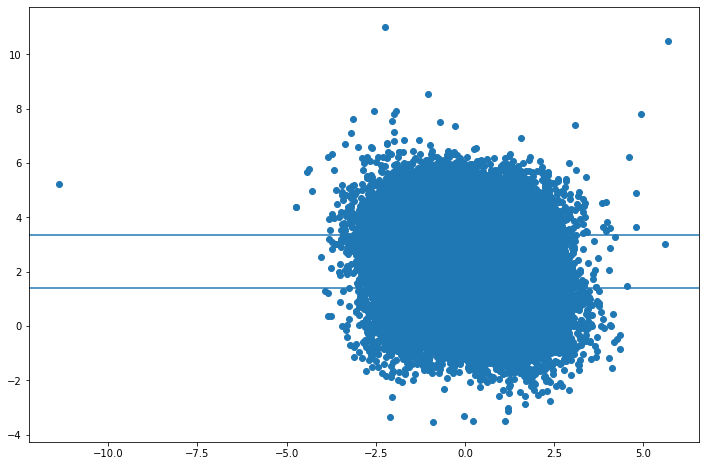

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(pitches['plate_x'],pitches['plate_z'])
plt.axhline(y=pitches['sz_top'][0])
plt.axhline(y=pitches['sz_bot'][0]);

In [54]:
pitches['sz_height'] = pitches['sz_top']-pitches['sz_bot']

In [55]:
pitches.describe()

,Unnamed: 0,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,...,deathMonth,deathDay,weight,height,time_since_debut,batter_allstar,MLBID_y,pitcher_allstar,run_diff,sz_height
count,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000,0.0,0.0,0.0,0.0,...,911.000000,911.000000,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000,298975.000000
mean,2040.430792,88.983217,-0.883959,5.794225,629118.511494,621324.720743,NaN,NaN,NaN,NaN,...,4.728869,11.766191,207.528168,72.889743,1992.824718,0.326539,621324.720743,0.218523,-0.154585,1.764435
std,1283.254383,6.183908,1.785052,0.535704,57070.437552,60052.332244,NaN,NaN,NaN,NaN,...,2.379406,3.807049,20.834044,2.242168,2159.928533,0.468948,60052.332244,0.413245,3.004174,0.128461
min,0.000000,33.400000,-4.700000,0.760000,408234.000000,425794.000000,NaN,NaN,NaN,NaN,...,3.000000,9.000000,140.000000,66.000000,0.000000,0.000000,425794.000000,0.000000,-24.000000,1.070000
25%,937.000000,84.600000,-2.130000,5.520000,600869.000000,593974.000000,NaN,NaN,NaN,NaN,...,3.000000,9.000000,192.000000,71.000000,725.000000,0.000000,593974.000000,0.000000,-2.000000,1.680000
50%,1917.000000,90.000000,-1.530000,5.830000,656180.000000,641927.000000,NaN,NaN,NaN,NaN,...,3.000000,9.000000,208.000000,73.000000,1698.000000,0.000000,641927.000000,0.000000,0.000000,1.760000
75%,3079.000000,93.900000,0.580000,6.120000,668930.000000,666159.000000,NaN,NaN,NaN,NaN,...,8.000000,17.000000,220.000000,74.000000,2880.000000,1.000000,666159.000000,0.000000,1.000000,1.850000
max,5394.000000,104.600000,4.640000,8.110000,807799.000000,700363.000000,NaN,NaN,NaN,NaN,...,8.000000,17.000000,282.000000,79.000000,39825.000000,1.000000,700363.000000,1.000000,19.000000,2.540000


In [56]:
pitches['description'].value_counts()

ball             200711
called_strike     98264
Name: description, dtype: int64

In [57]:
def high_or_low(df):
    if (df['plate_z']>df['sz_top'] or df['plate_z']<df['sz_bot']):
        return 1
    else:
        return 0

pitches['high_or_low_pitch'] = pitches.apply(high_or_low,axis=1)

In [58]:
batting = batting()

In [59]:
batting[batting['yearID']==2022].head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
110498,abbotco01,2022,1,WAS,NL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110499,abramcj01,2022,1,SDN,NL,46,125,16,29,5,...,11.0,1.0,2.0,4,27.0,0.0,6.0,2.0,2.0,4.0
110500,abramcj01,2022,2,WAS,NL,44,159,17,41,7,...,10.0,6.0,2.0,1,23.0,0.0,3.0,0.0,0.0,1.0
110501,abreual01,2022,1,TEX,AL,7,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
110502,abreual01,2022,2,KCA,AL,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112184 entries, 0 to 112183
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  112184 non-null  object 
 1   yearID    112184 non-null  int64  
 2   stint     112184 non-null  int64  
 3   teamID    112184 non-null  object 
 4   lgID      111447 non-null  object 
 5   G         112184 non-null  int64  
 6   AB        112184 non-null  int64  
 7   R         112184 non-null  int64  
 8   H         112184 non-null  int64  
 9   2B        112184 non-null  int64  
 10  3B        112184 non-null  int64  
 11  HR        112184 non-null  int64  
 12  RBI       111428 non-null  float64
 13  SB        109816 non-null  float64
 14  CS        88642 non-null   float64
 15  BB        112184 non-null  int64  
 16  SO        110084 non-null  float64
 17  IBB       75533 non-null   float64
 18  HBP       109368 non-null  float64
 19  SH        106116 non-null  float64
 20  SF  

In [61]:
batting['SLG'] = (batting['HR']*4 + batting['3B']*3 + batting['2B']*2 + batting['H']-(batting['HR']+batting['3B']+batting['2B']))/batting['AB']

In [62]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,SLG
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.000000
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,0.322034
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,0.394161
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,0.481203
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,0.466667


In [63]:
batting['OBP'] = (batting['H'] + batting['BB'] + batting['HBP'])/(batting['AB'] + batting['BB'] + batting['HBP'] + batting['SF'])

In [64]:
batting.tail(50)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,SLG,OBP
112134,willide03,2022,1,MIL,NL,65,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112135,willilu01,2022,1,SFN,NL,8,12,1,3,1,...,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000
112136,willilu01,2022,2,MIA,NL,71,115,20,27,4,...,4.0,9,40.0,1.0,0.0,0.0,0.0,1.0,0.313043,0.290323
112137,willitr01,2022,1,NYN,NL,30,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112138,wilsobr02,2022,1,PIT,NL,25,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112139,wilsoju10,2022,1,CIN,NL,5,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112140,wilsoma02,2022,1,SEA,AL,3,5,1,1,0,...,0.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.333333
112141,wilsost02,2022,1,SDN,NL,50,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112142,winckjo01,2022,1,BOS,AL,15,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
112143,windejo01,2022,1,MIN,AL,15,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [65]:
batting['OPS'] = batting['SLG'] + batting['OBP']

In [66]:
from pybaseball import statcast_batter
from pybaseball import  playerid_lookup
import pybaseball

In [67]:
playerid_lookup('kwan','steven')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,kwan,steven,680757,kwans001,kwanst01,24610,2022.0,2023.0


In [68]:
kwan_stats = statcast_batter('2023-03-30','2023-08-14',680757)

In [69]:
kwan_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SI,2023-08-13,93.0,-2.42,5.88,"Kwan, Steven",680757,621107,single,hit_into_play,...,0,4,0,4,0,Standard,Standard,224.0,-0.036,0.666
1,ST,2023-08-13,84.2,4.35,5.25,"Kwan, Steven",680757,518617,field_out,hit_into_play,...,1,8,1,8,1,Standard,Standard,270.0,0.003,-0.331
2,ST,2023-08-13,84.8,4.30,5.22,"Kwan, Steven",680757,518617,None,ball,...,1,8,1,8,1,Standard,Standard,309.0,0.000,0.045
3,ST,2023-08-13,82.6,4.39,5.28,"Kwan, Steven",680757,518617,None,foul,...,1,8,1,8,1,Standard,Standard,295.0,0.000,-0.095
4,FF,2023-08-13,94.2,4.18,5.39,"Kwan, Steven",680757,518617,None,called_strike,...,1,8,1,8,1,Standard,Standard,111.0,0.000,-0.079


In [70]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,bbrefID,time_since_debut,batter_allstar,MLBID_y,pitcher_name,pitcher_id,pitcher_allstar,run_diff,sz_height,high_or_low_pitch
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,thomaal01,505,0,605280,Clay Holmes,holmecl01,1,-2,1.97,0
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,thomaal01,505,0,605280,Clay Holmes,holmecl01,1,-2,1.89,0
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,thomaal01,505,0,605280,Clay Holmes,holmecl01,1,-2,1.73,1
3,939,ST,2023-09-25,82.2,-0.90,6.56,572233,605280,strikeout,called_strike,...,walkech02,3295,0,605280,Clay Holmes,holmecl01,1,-2,1.91,0
4,1001,ST,2023-09-25,80.7,-1.00,6.55,572233,605280,NaN,called_strike,...,walkech02,3295,0,605280,Clay Holmes,holmecl01,1,-2,1.87,0


In [71]:
pitches['bats'].head()

0    L
1    L
2    L
3    R
4    R
Name: bats, dtype: object

In [72]:
pitches['handed_matchup'] = pitches['p_throws'] + '-' + pitches['bats']

In [73]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,time_since_debut,batter_allstar,MLBID_y,pitcher_name,pitcher_id,pitcher_allstar,run_diff,sz_height,high_or_low_pitch,handed_matchup
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,505,0,605280,Clay Holmes,holmecl01,1,-2,1.97,0,R-L
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,505,0,605280,Clay Holmes,holmecl01,1,-2,1.89,0,R-L
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,505,0,605280,Clay Holmes,holmecl01,1,-2,1.73,1,R-L
3,939,ST,2023-09-25,82.2,-0.90,6.56,572233,605280,strikeout,called_strike,...,3295,0,605280,Clay Holmes,holmecl01,1,-2,1.91,0,R-R
4,1001,ST,2023-09-25,80.7,-1.00,6.55,572233,605280,NaN,called_strike,...,3295,0,605280,Clay Holmes,holmecl01,1,-2,1.87,0,R-R


In [74]:
pitches['height*hi_lo'] = pitches['height']*pitches['high_or_low_pitch']

In [75]:
pitches.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,...,batter_allstar,MLBID_y,pitcher_name,pitcher_id,pitcher_allstar,run_diff,sz_height,high_or_low_pitch,handed_matchup,height*hi_lo
0,794,SL,2023-09-25,84.8,-0.78,6.74,677950,605280,NaN,ball,...,0,605280,Clay Holmes,holmecl01,1,-2,1.97,0,R-L,0.0
1,880,SI,2023-09-25,93.3,-0.92,6.60,677950,605280,NaN,called_strike,...,0,605280,Clay Holmes,holmecl01,1,-2,1.89,0,R-L,0.0
2,902,SI,2023-09-25,93.2,-0.83,6.64,677950,605280,NaN,ball,...,0,605280,Clay Holmes,holmecl01,1,-2,1.73,1,R-L,71.0
3,939,ST,2023-09-25,82.2,-0.90,6.56,572233,605280,strikeout,called_strike,...,0,605280,Clay Holmes,holmecl01,1,-2,1.91,0,R-R,0.0
4,1001,ST,2023-09-25,80.7,-1.00,6.55,572233,605280,NaN,called_strike,...,0,605280,Clay Holmes,holmecl01,1,-2,1.87,0,R-R,0.0


In [76]:
pitches[pitches['description']=='called_strike'][['plate_x','plate_z']].describe()

,plate_x,plate_z
count,98264.000000,98264.000000
mean,0.012991,2.376421
std,0.521235,0.546351
min,-1.380000,1.060000
25%,-0.430000,1.930000
50%,0.020000,2.340000
75%,0.450000,2.800000
max,1.390000,5.410000


In [77]:
pitches = pitches.loc[(pitches['plate_x']<=1.39) & (pitches['plate_x']>=-1.38) & (pitches['plate_z']<=5.41) & (pitches['plate_z']>=1.06)]

In [78]:
pitches.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224425 entries, 1 to 298973
Data columns (total 130 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Unnamed: 0                       224425 non-null  int64         
 1   pitch_type                       224425 non-null  object        
 2   game_date                        224425 non-null  datetime64[ns]
 3   release_speed                    224425 non-null  float64       
 4   release_pos_x                    224425 non-null  float64       
 5   release_pos_z                    224425 non-null  float64       
 6   batter                           224425 non-null  int64         
 7   pitcher                          224425 non-null  int64         
 8   events                           16448 non-null   object        
 9   description                      224425 non-null  object        
 10  spin_dir                         0 non-null

In [79]:
pitches['pa'] = pitches['game_pk'].astype(str) + '-' + pitches['at_bat_number'].astype(str)

In [80]:
import seaborn as sns

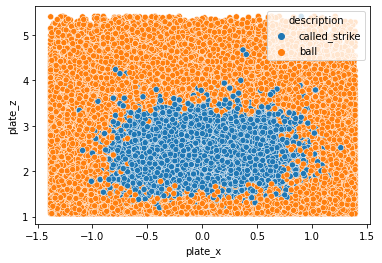

In [81]:
sns.scatterplot(data = pitches, x = 'plate_x', y = 'plate_z', hue = 'description');

In [82]:
unique_pas = list(pd.unique(pitches['pa']))

In [83]:
def true_pitch(df):
    if df['zone']>10 and df['description']=='ball':
        return 'true ball'
    elif df['zone']>10 and df['description']!='ball':
        return 'false called_strike'
    elif df['zone']<=10 and df['description']!='ball':
        return 'true called_strike'
    else:
        return 'false ball'

In [84]:
pitches['true_pitch'] = pitches.apply(true_pitch,axis=1)

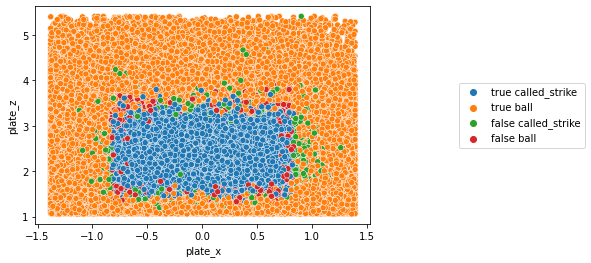

In [85]:
sns.scatterplot(data = pitches, x = 'plate_x', y = 'plate_z', hue = 'true_pitch').legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

In [86]:
false_strikes = pitches.loc[pitches['true_pitch'] == 'false called_strike']

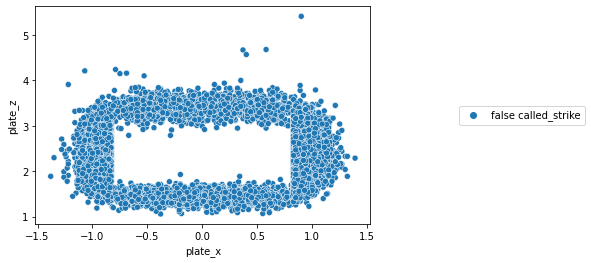

In [87]:
sns.scatterplot(data = false_strikes, x = 'plate_x', y = 'plate_z', hue = 'true_pitch').legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

In [88]:
#sns.scatterplot(data = pitches, x = pitches.index, y = 'plate_z', hue = 'true_pitch').legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

In [89]:
high_false_strikes = false_strikes.loc[(false_strikes['plate_z']>2.5) & (false_strikes['plate_x']>=-.83) & (false_strikes['plate_x']<=.83)]
low_false_strikes = false_strikes.loc[(false_strikes['plate_z']<2.5) & (false_strikes['plate_x']>=-.83) & (false_strikes['plate_x']<=.83)]
left_false_strikes = false_strikes.loc[(false_strikes['plate_x']<0) & (false_strikes['plate_x']<-.83)]
right_false_strikes = false_strikes.loc[(false_strikes['plate_x']>0) & (false_strikes['plate_x']>.83)]

In [90]:
false_strike_types = [{'High':high_false_strikes},{'Low':low_false_strikes},{'Left':left_false_strikes},{'Right':right_false_strikes}]
def outlier_finder(df):   
    x_Q3 = df.describe()['plate_x']['75%']
    x_Q1 = df.describe()['plate_x']['25%']
    z_Q3 = df.describe()['plate_z']['75%']
    z_Q1 = df.describe()['plate_z']['25%']
    x_lower_bound = x_Q1 - 1.5*(x_Q3-x_Q1)
    x_upper_bound = x_Q3 + 1.5*(x_Q3-x_Q1)
    z_lower_bound = z_Q1 - 1.5*(z_Q3-z_Q1)
    z_upper_bound = z_Q3 + 1.5*(z_Q3-z_Q1)
    print(f'X outliers lie outside the range ({x_lower_bound},{x_upper_bound})')
    print(f'Z outliers lie outside the range ({z_lower_bound},{z_upper_bound})')

In [91]:
for strike in false_strike_types:
    for name,zone in strike.items():
        print(name)
        outlier_finder(zone)

High
X outliers lie outside the range (-1.535,1.465)
Z outliers lie outside the range (2.9450000000000003,3.865)
Low
X outliers lie outside the range (-1.5237500000000002,1.52625)
Z outliers lie outside the range (1.0949999999999998,1.8550000000000004)
Left
X outliers lie outside the range (-1.095,-0.7350000000000001)
Z outliers lie outside the range (0.9449999999999992,3.785000000000001)
Right
X outliers lie outside the range (0.72,1.1199999999999999)
Z outliers lie outside the range (1.0199999999999998,3.74)


In [92]:
pitches['true_pitch'].value_counts()

true ball              115956
true called_strike      86071
false called_strike     12193
false ball              10205
Name: true_pitch, dtype: int64

In [93]:
pitches = pitches.loc[(pitches['plate_z']<3.86) |
           (pitches['plate_z']>1.09) |
           (pitches['plate_x']<1.11) |
           (pitches['plate_x']>-1.09)]

In [94]:
pitches = pitches.sort_values(by=['pa','pitch_number'])

In [95]:
pitches['pa']

113203     716436-1
113200     716436-1
113248    716436-10
113213    716436-11
113205    716436-12
            ...    
215069    718782-89
251462     718782-9
251460     718782-9
251459     718782-9
215067    718782-90
Name: pa, Length: 224425, dtype: object

In [96]:
pa = pitches['pa'].iloc[0]
previous_pitches = []
def makeup_call(df):
    global pa
    global previous_pitches
    if df['pa'] != pa:
        pa = df['pa']
        previous_pitches = []
        previous_pitches.append(df['true_pitch'])
        return 0
    else:
        if 'false ball' in previous_pitches:
            previous_pitches.append(df['true_pitch'])
            return 1
        else:
            previous_pitches.append(df['true_pitch'])
            return 0

In [97]:
def ump_already_screwed(df):
    global pa
    global previous_pitches
    if df['pa'] != pa:
        pa = df['pa']
        previous_pitches = []
        previous_pitches.append(df['true_pitch'])
        return 0
    else:
        if 'false called_strike' in previous_pitches:
            previous_pitches.append(df['true_pitch'])
            return 1
        else:
            previous_pitches.append(df['true_pitch'])
            return 0

In [98]:
pitches['ump_already_screwed'] = pitches.apply(ump_already_screwed,axis=1)

In [99]:
pitches['makeup_call_potential'] = pitches.apply(makeup_call,axis=1)

In [100]:
makeup_pas = pitches.groupby(by='pa')['makeup_call_potential'].sum()>=1

In [101]:
makeup_pas

pa
716436-1     False
716436-10    False
716436-11    False
716436-12    False
716436-17    False
             ...  
718782-86    False
718782-88    False
718782-89    False
718782-9      True
718782-90    False
Name: makeup_call_potential, Length: 115593, dtype: bool

In [102]:
makeup_pas[makeup_pas].index

Index(['716439-19', '716440-15', '716440-20', '716440-62', '716441-27',
       '716442-42', '716444-30', '716445-21', '716445-26', '716445-46',
       ...
       '718780-81', '718781-23', '718781-41', '718781-45', '718781-7',
       '718782-2', '718782-40', '718782-57', '718782-58', '718782-9'],
      dtype='object', name='pa', length=5166)

In [103]:
pitches.loc[pitches['pa'].isin(makeup_pas[makeup_pas].index)][['pa','pitch_number','true_pitch','makeup_call_potential']].head(100)

,pa,pitch_number,true_pitch,makeup_call_potential
229385,716439-19,1,true ball,0
229384,716439-19,2,false ball,0
229383,716439-19,3,true ball,1
30416,716440-15,1,false ball,0
30415,716440-15,2,true called_strike,1
...,...,...,...,...
44481,716457-39,4,true ball,1
44480,716457-39,5,true ball,1
44478,716457-40,1,false ball,0
44477,716457-40,3,true ball,1


In [104]:
pitches['makeup_call_potential'].value_counts()

0    216019
1      8406
Name: makeup_call_potential, dtype: int64

In [105]:
pitches['true_pitch'].value_counts()

true ball              115956
true called_strike      86071
false called_strike     12193
false ball              10205
Name: true_pitch, dtype: int64

In [106]:
pitches['count'] = pitches['balls'].astype(str) + '-' + pitches['strikes'].astype(str)

In [107]:
pitches.groupby(by=['count','true_pitch'])['pitch_type'].count()

count  true_pitch         
0-0    false ball              3656
       false called_strike     5185
       true ball              35135
       true called_strike     41757
0-1    false ball              1523
       false called_strike     1058
       true ball              16123
       true called_strike      7372
0-2    false ball               454
       false called_strike      220
       true ball               7820
       true called_strike      1227
1-0    false ball              1057
       false called_strike     1778
       true ball              11621
       true called_strike     11839
1-1    false ball               932
       false called_strike      945
       true ball              11377
       true called_strike      5668
1-2    false ball               642
       false called_strike      378
       true ball               9710
       true called_strike      1868
2-0    false ball               328
       false called_strike      648
       true ball               3789
 

In [108]:
pitches.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224425 entries, 113203 to 215067
Data columns (total 135 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Unnamed: 0                       224425 non-null  int64         
 1   pitch_type                       224425 non-null  object        
 2   game_date                        224425 non-null  datetime64[ns]
 3   release_speed                    224425 non-null  float64       
 4   release_pos_x                    224425 non-null  float64       
 5   release_pos_z                    224425 non-null  float64       
 6   batter                           224425 non-null  int64         
 7   pitcher                          224425 non-null  int64         
 8   events                           16448 non-null   object        
 9   description                      224425 non-null  object        
 10  spin_dir                         0 non

In [109]:
pitches['pfx_x'].head()

113203   -1.45
113200   -0.90
113248   -1.05
113213    0.13
113205    0.07
Name: pfx_x, dtype: float64

In [110]:
pitches['on_base'] = np.where(pitches['on_1b'].notna(),'1','_')
pitches['on_base'] = pitches['on_base'] + '-' + np.where(pitches['on_2b'].notna(),'2','_')
pitches['on_base'] = pitches['on_base'] + '-' + np.where(pitches['on_3b'].notna(),'3','_')

In [111]:
pitches = pitches.loc[(pitches['true_pitch'] == 'false called_strike') | (pitches['true_pitch'] == 'true ball')]

In [112]:
def inning_bins(df):
    if df['inning'] <=3:
        return 'beg'
    elif 3<df['inning']<=6:
        return 'mid'
    else:
        return 'end'
    
pitches['inning_bins'] = pitches.apply(inning_bins,axis=1)

In [113]:
def alt_inning_bins(df):
    if df['inning'] <=4:
        return 0
    else:
        return 1
    
pitches['alt_inning_bins'] = pitches.apply(alt_inning_bins,axis=1)

In [114]:
pitches['count'].value_counts()

0-0    40320
0-1    17181
1-0    13399
1-1    12322
1-2    10088
0-2     8040
2-2     7757
2-1     5934
2-0     4437
3-2     4214
3-1     2666
3-0     1790
4-2        1
Name: count, dtype: int64

In [115]:
def run_diff_bins(df):
    if abs(df['run_diff'])>4:
        return 1
    else:
        return 0
    
pitches['run_diff_bins'] = pitches.apply(run_diff_bins,axis=1)

In [116]:
pitches['plate_z_scaled']= abs(pitches['plate_z']-(pitches['sz_height']/2))

# Feature Analysis, Final Feature Engineering, Fine-Tuning of Model Components

In [117]:
num_vars = ['pfx_x','pfx_z','plate_x','plate_z_scaled','effective_speed','at_bat_number','weight','height','time_since_debut','run_diff','sz_height','height*hi_lo']
cat_vars = ['outs_when_up','inning_bins','birthCountry','batter_allstar','pitcher_allstar','high_or_low_pitch','handed_matchup','makeup_call_potential','count','on_base','ump_already_screwed']

In [118]:
pitches['true_pitch'].value_counts(normalize=True)

true ball              0.904853
false called_strike    0.095147
Name: true_pitch, dtype: float64

In [119]:
pitches.groupby(by='inning')['true_pitch'].value_counts(normalize=True)

inning  true_pitch         
1       true ball              0.910417
        false called_strike    0.089583
2       true ball              0.907728
        false called_strike    0.092272
3       true ball              0.905932
        false called_strike    0.094068
4       true ball              0.906010
        false called_strike    0.093990
5       true ball              0.899784
        false called_strike    0.100216
6       true ball              0.901968
        false called_strike    0.098032
7       true ball              0.903283
        false called_strike    0.096717
8       true ball              0.904260
        false called_strike    0.095740
9       true ball              0.901325
        false called_strike    0.098675
10      true ball              0.906897
        false called_strike    0.093103
11      true ball              0.894472
        false called_strike    0.105528
12      true ball              0.959459
        false called_strike    0.040541
13      true

In [120]:
for cat in cat_vars:
    print(pitches.groupby(by=cat)['true_pitch'].value_counts(normalize=True))

outs_when_up  true_pitch         
0             true ball              0.902244
              false called_strike    0.097756
1             true ball              0.905773
              false called_strike    0.094227
2             true ball              0.906706
              false called_strike    0.093294
Name: true_pitch, dtype: float64
inning_bins  true_pitch         
beg          true ball              0.908075
             false called_strike    0.091925
end          true ball              0.903206
             false called_strike    0.096794
mid          true ball              0.902639
             false called_strike    0.097361
Name: true_pitch, dtype: float64
birthCountry  true_pitch         
Aruba         true ball              0.886316
              false called_strike    0.113684
Australia     true ball              0.934783
              false called_strike    0.065217
Bahamas       true ball              0.890785
              false called_strike    0.109215
Brazil     

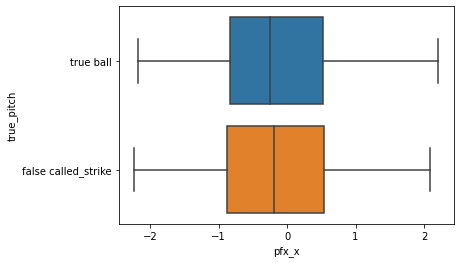

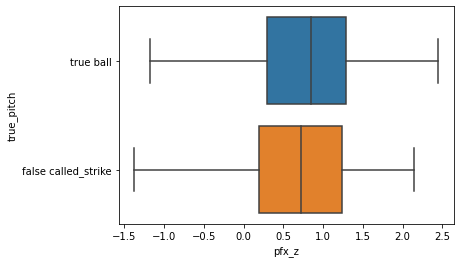

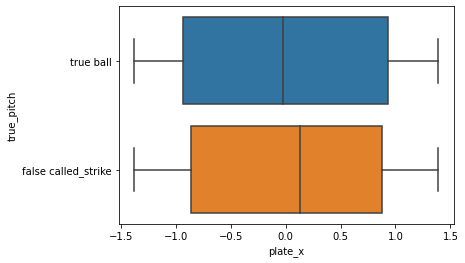

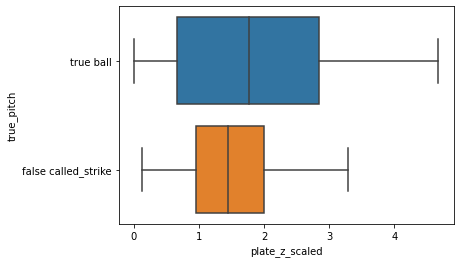

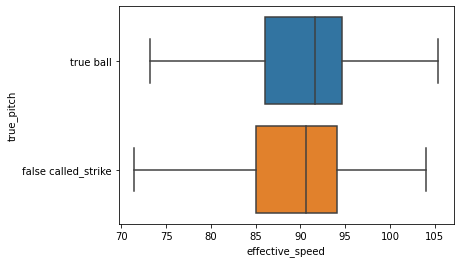

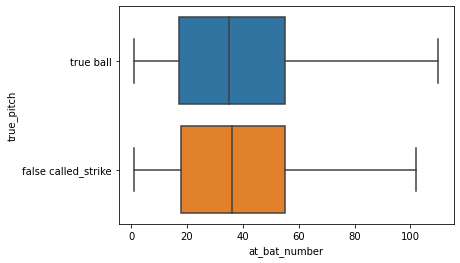

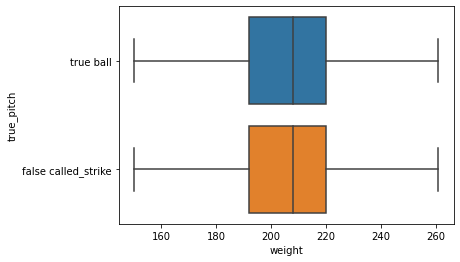

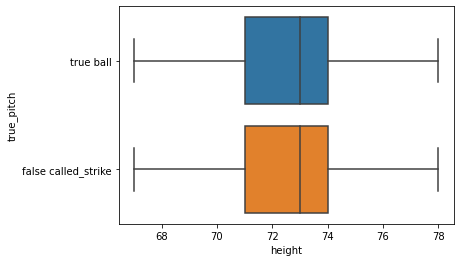

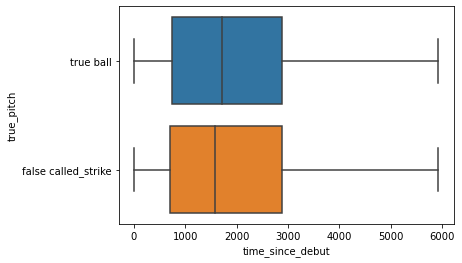

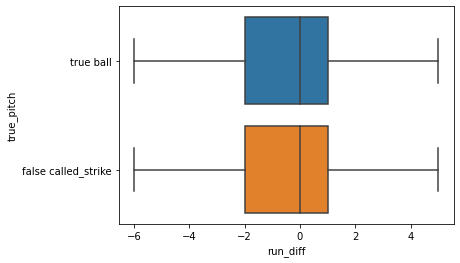

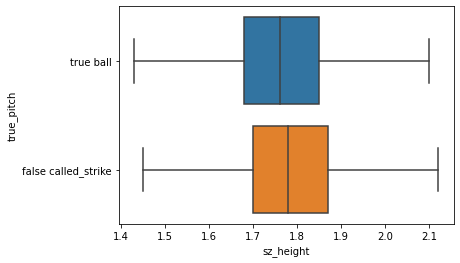

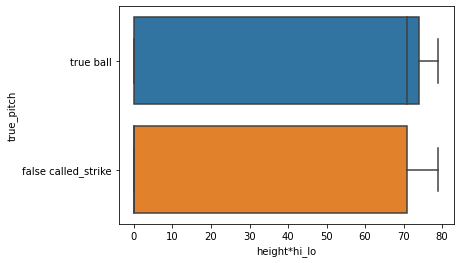

In [121]:
for num in num_vars:
    plt.figure()
    sns.boxplot(data=pitches, x=num, y="true_pitch",showfliers=False)

In [122]:
all_vars = num_vars + cat_vars

In [123]:
factors = pitches[all_vars]

In [124]:
factors.head()

,pfx_x,pfx_z,plate_x,plate_z_scaled,effective_speed,at_bat_number,weight,height,time_since_debut,run_diff,...,inning_bins,birthCountry,batter_allstar,pitcher_allstar,high_or_low_pitch,handed_matchup,makeup_call_potential,count,on_base,ump_already_screwed
113203,-1.45,0.32,-0.89,2.380,94.9,1,166.0,66.0,4450,0,...,beg,Venezuela,1,1,1,R-R,0,0-0,_-_-_,0
113213,0.13,-0.19,0.51,0.395,86.4,11,173.0,72.0,1541,0,...,beg,Honduras,0,1,1,R-R,0,0-1,_-_-3,0
113205,0.07,0.14,0.86,0.480,85.0,12,230.0,72.0,4405,1,...,beg,P.R.,0,1,1,R-R,0,0-0,1-_-_,0
113204,-1.57,0.18,-0.39,2.775,95.6,12,230.0,72.0,4405,1,...,beg,P.R.,0,1,1,R-R,0,1-0,1-_-_,0
203277,-0.62,1.61,-0.79,3.490,92.7,17,213.0,71.0,3400,-3,...,beg,Venezuela,1,1,1,R-R,0,0-2,_-_-_,0


In [125]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128149 entries, 113203 to 251460
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   pfx_x                  128149 non-null  float64
 1   pfx_z                  128149 non-null  float64
 2   plate_x                128149 non-null  float64
 3   plate_z_scaled         128149 non-null  float64
 4   effective_speed        128149 non-null  float64
 5   at_bat_number          128149 non-null  int64  
 6   weight                 128149 non-null  float64
 7   height                 128149 non-null  float64
 8   time_since_debut       128149 non-null  int64  
 9   run_diff               128149 non-null  int64  
 10  sz_height              128149 non-null  float64
 11  height*hi_lo           128149 non-null  float64
 12  outs_when_up           128149 non-null  int64  
 13  inning_bins            128149 non-null  object 
 14  birthCountry           128149 n

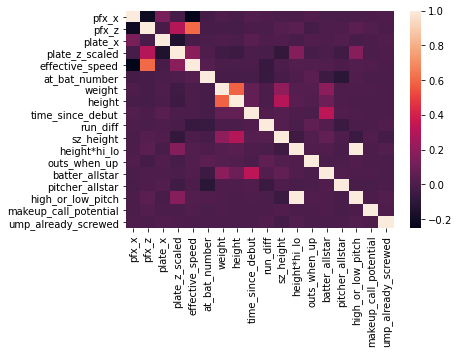

In [126]:
sns.heatmap(factors.corr());

In [127]:
pitches['height'].corr(pitches['weight'])

0.5889557906169752

In [128]:
pitches['abs_plate_x'] = abs(pitches['plate_x'])
pitches['abs_pfx_x'] = abs(pitches['pfx_x'])

In [129]:
factors = factors.drop(['plate_x','pfx_x'],axis=1)

In [130]:
factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128149 entries, 113203 to 251460
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   pfx_z                  128149 non-null  float64
 1   plate_z_scaled         128149 non-null  float64
 2   effective_speed        128149 non-null  float64
 3   at_bat_number          128149 non-null  int64  
 4   weight                 128149 non-null  float64
 5   height                 128149 non-null  float64
 6   time_since_debut       128149 non-null  int64  
 7   run_diff               128149 non-null  int64  
 8   sz_height              128149 non-null  float64
 9   height*hi_lo           128149 non-null  float64
 10  outs_when_up           128149 non-null  int64  
 11  inning_bins            128149 non-null  object 
 12  birthCountry           128149 non-null  object 
 13  batter_allstar         128149 non-null  int64  
 14  pitcher_allstar        128149 n

In [131]:
from sklearn.preprocessing import OrdinalEncoder

In [132]:
oe = OrdinalEncoder(categories=[['3-0','3-1','1-0','2-0','0-0','1-1','2-1','3-2','0-1','2-2','1-2','0-2']])

In [133]:
pitches['count'].value_counts()

0-0    40320
0-1    17181
1-0    13399
1-1    12322
1-2    10088
0-2     8040
2-2     7757
2-1     5934
2-0     4437
3-2     4214
3-1     2666
3-0     1790
4-2        1
Name: count, dtype: int64

In [134]:
pitches = pitches[pitches['count']!='4-2']

In [135]:
pitches['count_ordered'] = oe.fit_transform(pitches['count'].values.reshape(-1,1))

In [136]:
factors.head()

,pfx_z,plate_z_scaled,effective_speed,at_bat_number,weight,height,time_since_debut,run_diff,sz_height,height*hi_lo,...,inning_bins,birthCountry,batter_allstar,pitcher_allstar,high_or_low_pitch,handed_matchup,makeup_call_potential,count,on_base,ump_already_screwed
113203,0.32,2.380,94.9,1,166.0,66.0,4450,0,1.52,66.0,...,beg,Venezuela,1,1,1,R-R,0,0-0,_-_-_,0
113213,-0.19,0.395,86.4,11,173.0,72.0,1541,0,1.69,72.0,...,beg,Honduras,0,1,1,R-R,0,0-1,_-_-3,0
113205,0.14,0.480,85.0,12,230.0,72.0,4405,1,1.74,72.0,...,beg,P.R.,0,1,1,R-R,0,0-0,1-_-_,0
113204,0.18,2.775,95.6,12,230.0,72.0,4405,1,1.63,72.0,...,beg,P.R.,0,1,1,R-R,0,1-0,1-_-_,0
203277,1.61,3.490,92.7,17,213.0,71.0,3400,-3,1.80,71.0,...,beg,Venezuela,1,1,1,R-R,0,0-2,_-_-_,0


In [137]:
at_bats = pitches.groupby(by='at_bat_number')['true_pitch'].value_counts(normalize=True).to_frame().reset_index(0)

In [138]:
at_bats

,at_bat_number,true_pitch
true_pitch,,
true ball,1,0.913422
false called_strike,1,0.086578
true ball,2,0.912134
false called_strike,2,0.087866
true ball,3,0.907928
...,...,...
true ball,110,1.000000
false called_strike,116,1.000000
true ball,117,1.000000


In [139]:
at_bats = at_bats[at_bats.index == 'false called_strike']

In [140]:
at_bats.rename({'true_pitch':'false call share'},axis=1,inplace=True)

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [141]:
at_bats.set_index('at_bat_number',inplace=True)

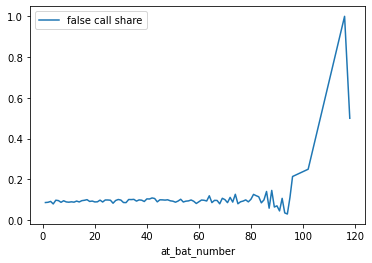

In [142]:
at_bats.plot();

In [143]:
pitches.groupby(by='inning')['true_pitch'].value_counts(normalize=True)

inning  true_pitch         
1       true ball              0.910417
        false called_strike    0.089583
2       true ball              0.907728
        false called_strike    0.092272
3       true ball              0.905932
        false called_strike    0.094068
4       true ball              0.906004
        false called_strike    0.093996
5       true ball              0.899784
        false called_strike    0.100216
6       true ball              0.901968
        false called_strike    0.098032
7       true ball              0.903283
        false called_strike    0.096717
8       true ball              0.904260
        false called_strike    0.095740
9       true ball              0.901325
        false called_strike    0.098675
10      true ball              0.906897
        false called_strike    0.093103
11      true ball              0.894472
        false called_strike    0.105528
12      true ball              0.959459
        false called_strike    0.040541
13      true

In [144]:
pitches.groupby(by='inning_bins')['true_pitch'].value_counts(normalize=True)

inning_bins  true_pitch         
beg          true ball              0.908075
             false called_strike    0.091925
end          true ball              0.903206
             false called_strike    0.096794
mid          true ball              0.902636
             false called_strike    0.097364
Name: true_pitch, dtype: float64

In [145]:
pitches.groupby(by='alt_inning_bins')['true_pitch'].value_counts(normalize=True)

alt_inning_bins  true_pitch         
0                true ball              0.907588
                 false called_strike    0.092412
1                true ball              0.902188
                 false called_strike    0.097812
Name: true_pitch, dtype: float64

In [146]:
pitches.groupby(by='run_diff')['true_pitch'].value_counts(normalize=True)

run_diff  true_pitch         
-24       true ball              1.000000
-23       true ball              0.833333
          false called_strike    0.166667
-19       true ball              1.000000
-18       true ball              0.750000
                                   ...   
 15       true ball              0.800000
          false called_strike    0.200000
 16       true ball              0.846154
          false called_strike    0.153846
 17       false called_strike    1.000000
Name: true_pitch, Length: 73, dtype: float64

In [147]:
pitches.groupby(by='run_diff_bins')['true_pitch'].value_counts(normalize=True)

run_diff_bins  true_pitch         
0              true ball              0.905731
               false called_strike    0.094269
1              true ball              0.898569
               false called_strike    0.101431
Name: true_pitch, dtype: float64

In [148]:
pitches['sz_height*hi_lo'] = pitches['sz_height']*pitches['high_or_low_pitch']

In [149]:
#on_base_types = list(pitches['on_base'].unique())
#mult_scoring_pos = on_base_types[-2:]
#nobody_on = on_base_types[2]
#other_on_base = on_base_types[0:2] + on_base_types[3:6]

In [150]:
def on_base_bins(df):
    if df['on_base'] == '1-2-3':
        return 2
    elif df['on_base'] == '_-_-_':
        return 1
    else:
        return 0

pitches['on_base_bins'] = pitches.apply(on_base_bins,axis=1)

In [151]:
def bats_num(df):
    if df['bats'] == 'L':
        return 0
    elif df['bats'] == 'B':
        return 1
    else:
        return 2

pitches['bats_num'] = pitches.apply(bats_num,axis=1)

In [152]:
def true_pitch_num(df):
    if df['true_pitch'] == 'true ball':
        return 0
    else:
        return 1
    
pitches['true_pitch_num'] = pitches.apply(true_pitch_num,axis=1)

# Modeling

In [153]:
Y = pitches['true_pitch_num']

In [154]:
final_num_vars = ['pfx_x','pfx_z','plate_x','plate_z_scaled','effective_speed','at_bat_number','weight','height','time_since_debut','run_diff','sz_height','height*hi_lo','abs_plate_x','abs_pfx_x','sz_height*hi_lo']
final_cat_vars = ['outs_when_up','inning_bins','birthCountry','batter_allstar','pitcher_allstar','high_or_low_pitch','handed_matchup','makeup_call_potential','count','on_base','run_diff_bins','count_ordered','alt_inning_bins','bats_num','on_base_bins','ump_already_screwed']

In [155]:
final_all_vars = final_num_vars + final_cat_vars

X = pitches[final_all_vars]

In [156]:
X = X.drop(['plate_x','pfx_x','run_diff','inning_bins','at_bat_number','count','handed_matchup','birthCountry','on_base'],axis=1)

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128148 entries, 113203 to 251460
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   pfx_z                  128148 non-null  float64
 1   plate_z_scaled         128148 non-null  float64
 2   effective_speed        128148 non-null  float64
 3   weight                 128148 non-null  float64
 4   height                 128148 non-null  float64
 5   time_since_debut       128148 non-null  int64  
 6   sz_height              128148 non-null  float64
 7   height*hi_lo           128148 non-null  float64
 8   abs_plate_x            128148 non-null  float64
 9   abs_pfx_x              128148 non-null  float64
 10  sz_height*hi_lo        128148 non-null  float64
 11  outs_when_up           128148 non-null  int64  
 12  batter_allstar         128148 non-null  int64  
 13  pitcher_allstar        128148 non-null  int64  
 14  high_or_low_pitch      128148 n

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
dt = DecisionTreeClassifier(max_depth=20,class_weight='balanced',random_state=42)

In [162]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=42)

In [163]:
from sklearn.metrics import precision_score,recall_score

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.5403799155743169
Test Precision: 0.3724594656314227
Train Recall: 0.9973347001537674
Test Recall: 0.6689909762100082


In [164]:
from sklearn.model_selection import cross_val_score

recall = cross_val_score(dt,X_train,y_train,scoring='recall')
recall

array([0.66940031, 0.67862635, 0.68580215, 0.65812404, 0.66735008])

In [165]:
recall.mean()

0.6718605843157356

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1,30)}

#grid_search = GridSearchCV(dt, param_grid, cv=5,scoring='f1')
#grid_search.fit(X_train, y_train)

#Get the best hyperparameters and score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#best_params

In [167]:
#best_score

In [168]:
importances = list(dt.feature_importances_)

In [169]:
names = list(X.columns)

In [170]:
importance_names = dict(zip(names,importances))

In [171]:
importance_names = dict(sorted(importance_names.items(),key = lambda x:x[1],reverse=True))

In [172]:
importance_names

{'plate_z_scaled': 0.39206238998406107,
 'abs_plate_x': 0.25602441212534877,
 'sz_height*hi_lo': 0.04299151929371203,
 'pfx_z': 0.04284680932884601,
 'effective_speed': 0.042410817080902,
 'time_since_debut': 0.0420563043849881,
 'abs_pfx_x': 0.03605553761700715,
 'sz_height': 0.030832307982694727,
 'weight': 0.027677285569647117,
 'count_ordered': 0.02724695387138037,
 'height': 0.015665859805835805,
 'high_or_low_pitch': 0.007717444969671103,
 'outs_when_up': 0.00605774592874844,
 'bats_num': 0.005409182036426098,
 'height*hi_lo': 0.004920283026282434,
 'on_base_bins': 0.004736501082014234,
 'batter_allstar': 0.004076687445935901,
 'run_diff_bins': 0.0028350621759845604,
 'alt_inning_bins': 0.0028300609421745516,
 'pitcher_allstar': 0.0026277269576008037,
 'ump_already_screwed': 0.001721774214060121,
 'makeup_call_potential': 0.0011973341766785004}

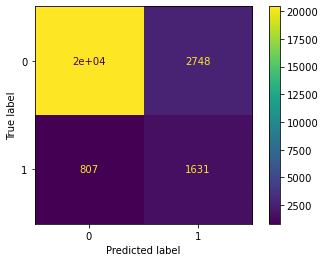

In [173]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt,X_test,y_test);

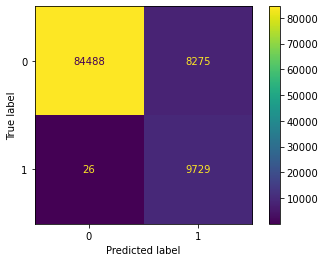

In [174]:
plot_confusion_matrix(dt,X_train,y_train);

In [175]:
train_p_list = []
test_p_list = []
train_r_list = []
test_r_list = []
max_depth_list = list(range(1,30))

for i in range(1,30):
    dt = DecisionTreeClassifier(max_depth=i,class_weight='balanced',random_state=42)
    dt.fit(X_train,y_train)
    
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    
    train_p = precision_score(y_train,y_train_pred)
    test_p = precision_score(y_test,y_test_pred)
    train_r = recall_score(y_train,y_train_pred)
    test_r = recall_score(y_test,y_test_pred)
    
    train_p_list.append(train_p)
    test_p_list.append(test_p)
    train_r_list.append(train_r)
    test_r_list.append(test_r) 

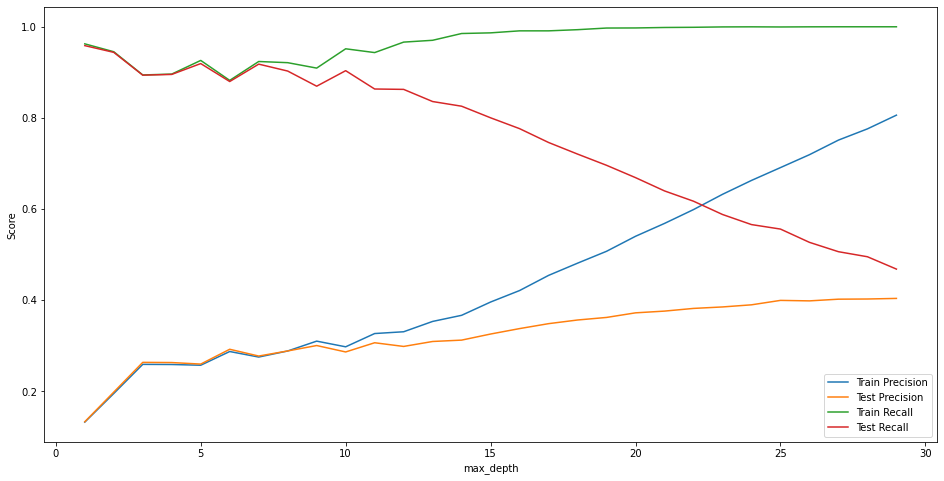

In [176]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(max_depth_list,train_p_list,label='Train Precision')
ax.plot(max_depth_list,test_p_list,label='Test Precision')
ax.plot(max_depth_list,train_r_list,label='Train Recall')
ax.plot(max_depth_list,test_r_list,label='Test Recall')
ax.set_xlabel('max_depth')
ax.set_ylabel('Score')
ax.legend();

In [177]:
from imblearn.under_sampling import RandomUnderSampler

In [178]:
under = RandomUnderSampler(random_state=42)
X_u, y_u = under.fit_resample(X_train,y_train)

In [179]:
dt_u = DecisionTreeClassifier(max_depth=7,random_state=42)

In [180]:
dt_u.fit(X_u,y_u)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [181]:
from sklearn.metrics import precision_score,recall_score

y_train_pred = dt_u.predict(X_u)
y_test_pred = dt_u.predict(X_test)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.7953446732318711
Test Precision: 0.2811337693984866
Train Recall: 0.9107124551512045
Test Recall: 0.8990976210008204


In [182]:
from sklearn.model_selection import cross_val_score

recall = cross_val_score(dt_u,X_u,y_u,scoring='recall')
recall

array([0.90363916, 0.92157868, 0.91747822, 0.93131727, 0.87493593])

In [183]:
recall.mean()

0.9097898513582778

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1,30)}

#grid_search = GridSearchCV(dt_u, param_grid, cv=5,scoring='f1')
#grid_search.fit(X_u, y_u)

#Get the best hyperparameters and score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#best_params

In [185]:
#best_score

In [186]:
importances = list(dt_u.feature_importances_)

In [187]:
names = list(X.columns)

In [188]:
importance_names = dict(zip(names,importances))

In [189]:
importance_names = dict(sorted(importance_names.items(),key = lambda x:x[1],reverse=True))

In [190]:
importance_names

{'plate_z_scaled': 0.5323685151340554,
 'abs_plate_x': 0.3664507301091868,
 'sz_height*hi_lo': 0.04729826442313568,
 'height*hi_lo': 0.017102190542527596,
 'count_ordered': 0.01345190281892531,
 'effective_speed': 0.008121671849194136,
 'sz_height': 0.003289382928812496,
 'abs_pfx_x': 0.002926516104795238,
 'weight': 0.0027868255606211213,
 'pfx_z': 0.0014252908917022557,
 'bats_num': 0.0013333046798574596,
 'time_since_debut': 0.0009952377075628934,
 'run_diff_bins': 0.0009372529313849059,
 'high_or_low_pitch': 0.0006040912274766167,
 'ump_already_screwed': 0.00045768909447142255,
 'on_base_bins': 0.00024312599695359882,
 'height': 0.0002080079993372671,
 'outs_when_up': 0.0,
 'batter_allstar': 0.0,
 'pitcher_allstar': 0.0,
 'makeup_call_potential': 0.0,
 'alt_inning_bins': 0.0}

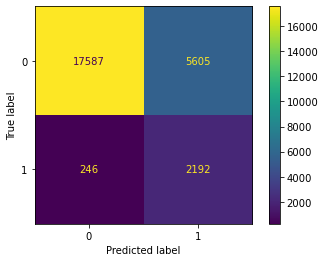

In [191]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_u,X_test,y_test);

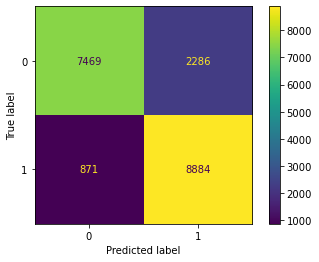

In [192]:
plot_confusion_matrix(dt_u,X_u,y_u);

In [193]:
train_p_list = []
test_p_list = []
train_r_list = []
test_r_list = []
max_depth_list = list(range(1,30))

for i in range(1,30):
    dt_u = DecisionTreeClassifier(max_depth=i,random_state=42)
    dt_u.fit(X_u,y_u)
    
    y_train_pred = dt_u.predict(X_u)
    y_test_pred = dt_u.predict(X_test)
    
    train_p = precision_score(y_u,y_train_pred)
    test_p = precision_score(y_test,y_test_pred)
    train_r = recall_score(y_u,y_train_pred)
    test_r = recall_score(y_test,y_test_pred)
    
    train_p_list.append(train_p)
    test_p_list.append(test_p)
    train_r_list.append(train_r)
    test_r_list.append(test_r)  

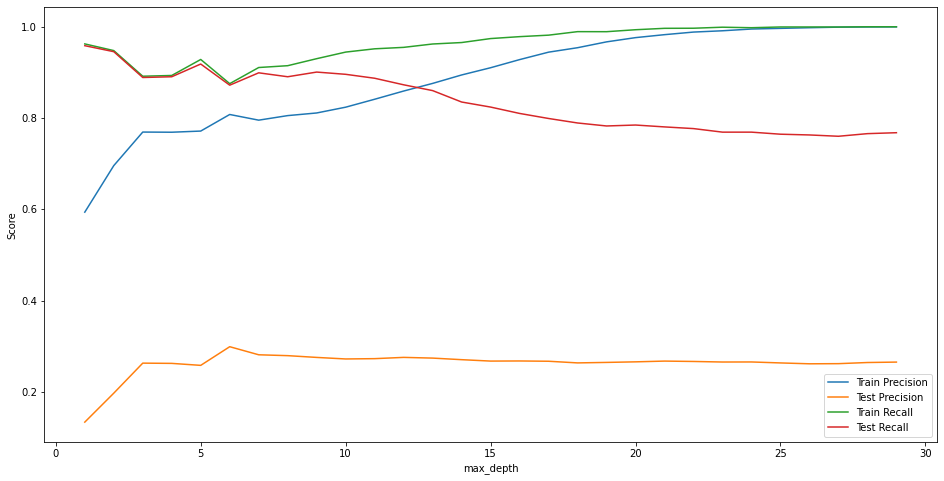

In [194]:
fig,ax = plt.subplots(figsize=(16,8))

ax.plot(max_depth_list,train_p_list,label='Train Precision')
ax.plot(max_depth_list,test_p_list,label='Test Precision')
ax.plot(max_depth_list,train_r_list,label='Train Recall')
ax.plot(max_depth_list,test_r_list,label='Test Recall')
ax.set_xlabel('max_depth')
ax.set_ylabel('Score')
ax.legend();

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [196]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [198]:
X_train_scaled_df.head()

,pfx_z,plate_z_scaled,effective_speed,weight,height,time_since_debut,sz_height,height*hi_lo,abs_plate_x,abs_pfx_x,...,batter_allstar,pitcher_allstar,high_or_low_pitch,makeup_call_potential,run_diff_bins,count_ordered,alt_inning_bins,bats_num,on_base_bins,ump_already_screwed
0,-0.551003,-0.525752,-0.381870,0.355881,0.486081,-0.771346,1.927642,-1.235730,0.039594,1.632188,...,-0.701408,-0.524348,-1.237208,-0.195499,-0.373676,0.460710,0.98634,-1.268284,0.715791,-0.213368
1,-1.049378,-0.489779,-1.750964,0.789466,-0.855509,-0.268609,0.369530,-1.235730,0.117529,-1.323937,...,-0.701408,1.907130,-1.237208,-0.195499,-0.373676,-1.286000,-1.01385,-1.268284,0.715791,-0.213368
2,1.200428,1.169455,0.572348,0.837643,0.038884,0.228066,1.382303,0.809728,-0.428015,-1.232275,...,1.425703,-0.524348,0.808271,-0.195499,2.676119,-0.587316,0.98634,0.890473,2.614210,-0.213368
3,0.018568,-1.119299,0.378739,-0.366762,0.038884,-0.126368,-0.253715,0.809728,-0.765733,1.655103,...,-0.701408,1.907130,0.808271,-0.195499,-0.373676,0.460710,-1.01385,0.890473,0.715791,-0.213368
4,1.072275,1.079524,0.724470,-0.125881,-0.855509,-0.019572,-0.331620,0.753688,-0.609863,-1.232275,...,-0.701408,-0.524348,0.808271,-0.195499,-0.373676,-0.587316,-1.01385,-1.268284,0.715791,-0.213368


In [199]:
log_model = LogisticRegression(C=1,class_weight='balanced',max_iter=200,random_state=42)

In [200]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=200, random_state=42)

In [201]:
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

train_p = precision_score(y_train,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_train,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.20826920014861208
Test Precision: 0.21068312406895084
Train Recall: 0.8045105074320861
Test Recall: 0.8121410992616899


In [202]:
#run grid search to tune logistic regression for best recall score
param_grid = {'max_iter': [100,200,500,1000],'C': [0.001, 0.01, 0.1,1],'class_weight':['balanced']}

#grid_search = GridSearchCV(log_model, param_grid, cv=5,scoring='f1')
#grid_search.fit(X_train_scaled, y_train)

#Get the best hyperparameters and score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#best_params

In [203]:
#best_score

In [204]:
#create a dictionary with column names and logistic regression coefficients
coef_dict = {}
for coef, feat in zip(log_model.coef_[0,:],X_train.columns):
    coef_dict[feat] = round(coef,2)
coef_dict = dict(sorted(coef_dict.items(),key=lambda x:x[1],reverse=True))
coef_dict

{'height*hi_lo': 0.37,
 'sz_height': 0.16,
 'bats_num': 0.08,
 'ump_already_screwed': 0.07,
 'on_base_bins': 0.06,
 'alt_inning_bins': 0.04,
 'pitcher_allstar': 0.02,
 'run_diff_bins': 0.02,
 'weight': 0.0,
 'abs_pfx_x': -0.0,
 'outs_when_up': -0.01,
 'time_since_debut': -0.02,
 'batter_allstar': -0.04,
 'pfx_z': -0.05,
 'makeup_call_potential': -0.05,
 'height': -0.06,
 'effective_speed': -0.11,
 'plate_z_scaled': -0.4,
 'count_ordered': -0.46,
 'sz_height*hi_lo': -0.76,
 'high_or_low_pitch': -1.15,
 'abs_plate_x': -1.48}

In [205]:
odds_dict = {}
for feat,coef in coef_dict.items():
    odds_dict[feat] = (np.exp(coef)-1)*100

In [206]:
odds_dict

{'height*hi_lo': 44.773461466332456,
 'sz_height': 17.35108709918103,
 'bats_num': 8.328706767495863,
 'ump_already_screwed': 7.250818125421654,
 'on_base_bins': 6.183654654535964,
 'alt_inning_bins': 4.081077419238821,
 'pitcher_allstar': 2.0201340026755776,
 'run_diff_bins': 2.0201340026755776,
 'weight': 0.0,
 'abs_pfx_x': 0.0,
 'outs_when_up': -0.9950166250831893,
 'time_since_debut': -1.9801326693244747,
 'batter_allstar': -3.9210560847676823,
 'pfx_z': -4.877057549928598,
 'makeup_call_potential': -4.877057549928598,
 'height': -5.823546641575128,
 'effective_speed': -10.416586470347177,
 'plate_z_scaled': -32.967995396436066,
 'count_ordered': -36.871635449307405,
 'sz_height*hi_lo': -53.23335729900908,
 'high_or_low_pitch': -68.33632306209468,
 'abs_plate_x': -77.23623116161873}

In [311]:
#import precision recall curve and area under the curve metrics
from sklearn.metrics import precision_recall_curve, auc

y_score = log_model.predict_proba(X_test_scaled)[:,1]
precision,recall,thresholds = precision_recall_curve(y_test,y_score)
print('AUC: {}'.format(auc(recall, precision)))

AUC: 0.30460876945828697


In [312]:
#calculate junk classifier for precision recall curve, which is equal to positive share of train set
y_train.value_counts(normalize=True)

0    0.904846
1    0.095154
Name: true_pitch_num, dtype: float64

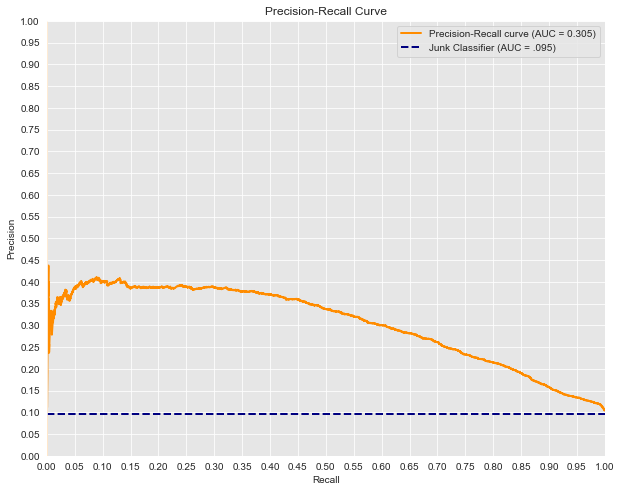

In [313]:
# Plot a Precision-Recall Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUC = 0.305)')
plt.plot([0, 1], [0.0951, .0951], color='navy', lw=lw, linestyle='--',label='Junk Classifier (AUC = .095)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [314]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.nanargmax(fscore)
print(f'Best Threshold={thresholds[ix]}, F-Score={fscore[ix]}')

Best Threshold=0.6875712862345901, F-Score=0.4063164287883389


<ipython-input-314-822bb6d7af79>:1: RuntimeWarning: invalid value encountered in true_divide
  fscore = (2 * precision * recall) / (precision + recall)


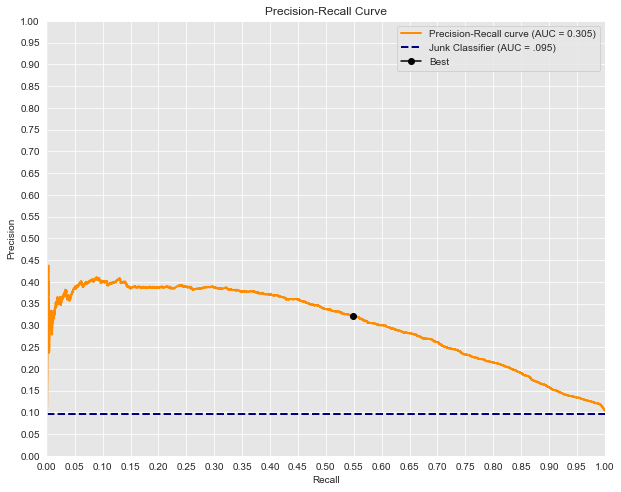

In [315]:
# Plot a Precision-Recall Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUC = 0.305)')
plt.plot([0, 1], [0.0951, .0951], color='navy', lw=lw, linestyle='--',label='Junk Classifier (AUC = .095)')
plt.plot(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

In [316]:
proba_predictions = log_model.predict_proba(X_test_scaled)

# Set the threshold (e.g., 0.5) to classify instances into classes
threshold = thresholds[ix]

# Convert probabilities to class labels based on the threshold
predicted_labels = (proba_predictions[:, 1] >= threshold).astype(int)

In [317]:
precision[ix]

0.32256509161041463

In [318]:
recall[ix]

0.5488105004101723

In [320]:
recall_score(y_test,predicted_labels)

0.5488105004101723

In [321]:
precision_score(y_test,predicted_labels)

0.32256509161041463

In [322]:
from sklearn.metrics import f1_score
f1_score(y_test,predicted_labels)

0.4063164287883389

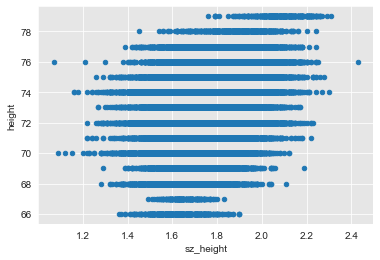

In [210]:
pitches.plot(x='sz_height',y='height',kind='scatter');

# Random Forest

In [327]:
#import random forest classifier, instantiate random forest model, and fit on train data
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300,max_depth=9,random_state=42)
clf.fit(X_u,y_u)

RandomForestClassifier(max_depth=9, n_estimators=300, random_state=42)

In [328]:
#evaluate model by looking at precision and recall scores on train and test sets
y_train_pred = clf.predict(X_u)
y_test_pred = clf.predict(X_test)

train_p = precision_score(y_u,y_train_pred)
test_p = precision_score(y_test,y_test_pred)
train_r = recall_score(y_u,y_train_pred)
test_r = recall_score(y_test,y_test_pred)

print(f'Train Precision: {train_p}')
print(f'Test Precision: {test_p}')
print(f'Train Recall: {train_r}')
print(f'Test Recall: {test_r}')

Train Precision: 0.8294407741695357
Test Precision: 0.31039953843934803
Train Recall: 0.9137878011276268
Test Recall: 0.8826907301066448


In [326]:
#run grid search to tune random forest for best recall score
param_grid = {'max_depth': range(2,10),'n_estimators': [100,200,300,400,500]}

grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='f1')
grid_search.fit(X_u, y_u)

#Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params

{'max_depth': 9, 'n_estimators': 300}

In [329]:
#look at best recall score with optimal parameters
best_score

0.8416437727873275

In [332]:
#similar to decision tree, look to see which columns had the highest feature importances
importances = list(clf.feature_importances_)
names = list(X_u.columns)
importance_names = dict(zip(names,importances))
importance_names = dict(sorted(importance_names.items(),key = lambda x:x[1],reverse=True))
importance_names

{'abs_plate_x': 0.3841529514904819,
 'plate_z_scaled': 0.2675293482854037,
 'sz_height*hi_lo': 0.06773011758975633,
 'high_or_low_pitch': 0.05762554079437338,
 'height*hi_lo': 0.05592743204731016,
 'count_ordered': 0.05126808275080583,
 'effective_speed': 0.018533851366491598,
 'sz_height': 0.017958114446643247,
 'pfx_z': 0.016833835713734993,
 'time_since_debut': 0.013417391683755634,
 'abs_pfx_x': 0.013402170813598685,
 'weight': 0.010208848006507626,
 'height': 0.007056164436415198,
 'bats_num': 0.004760715879384404,
 'outs_when_up': 0.0027486035377633825,
 'on_base_bins': 0.002614836760511573,
 'alt_inning_bins': 0.0016339928935479682,
 'run_diff_bins': 0.0016135197946541768,
 'batter_allstar': 0.0015397346373232713,
 'pitcher_allstar': 0.0015184186503110757,
 'ump_already_screwed': 0.0012594038168300186,
 'makeup_call_potential': 0.0006669246043958529}

In [ ]:
#plot confusion matrix for random forest model
plot_confusion_matrix(clf,X_u,y_test);